In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.shape

(6362620, 11)

C:\Users\ethan\AppData\Local\Temp\ipykernel_33884\338196717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='isFraud', palette='pastel')


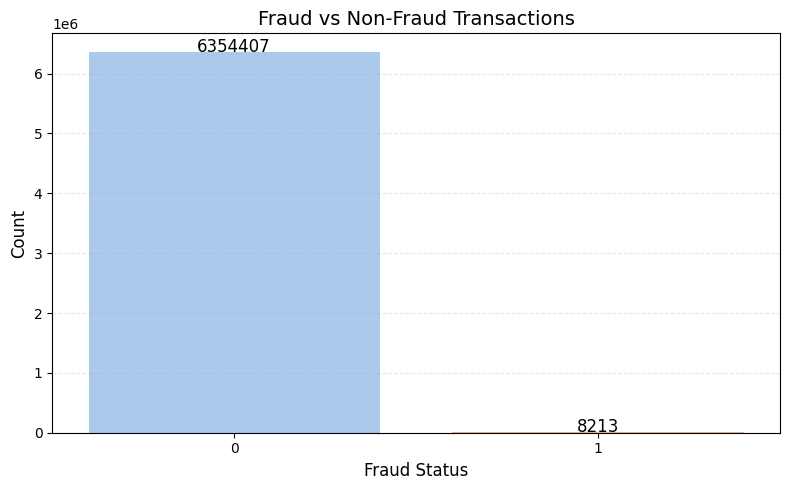

In [11]:
# Create the countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='isFraud', palette='pastel')

# Add the numbers manually using plt.text
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 100, f'{count}', ha='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, color='black')
plt.xlabel('Fraud Status', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

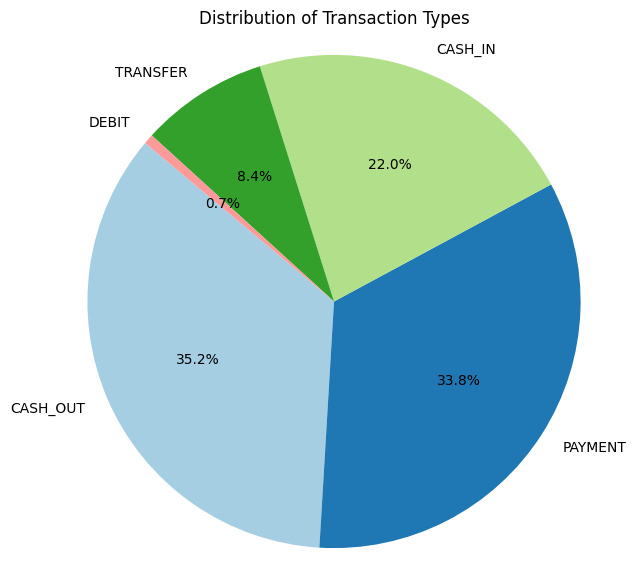

In [ ]:
# Count each transaction type
type_counts = df['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Transaction Types')
plt.axis('equal')  # Keeps the pie chart round
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

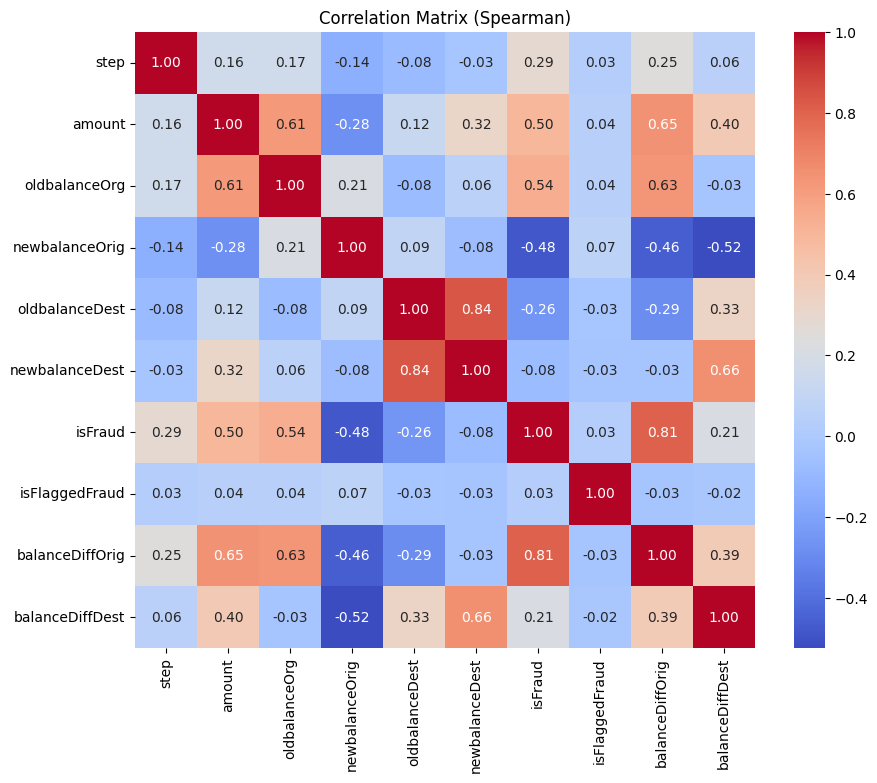

In [4]:
# Compute balance differences
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] 
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']
#splinting the data in fraud and not fraud
fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0]

# Random sampling while maintaining class proportions
# This is especially useful for dealing with imbalanced datasets in a controlled manner.
non_fraud_sample = non_fraud_data.sample(n=len(fraud_data), random_state=42)

#Concat the balanced sample
balanced_df = pd.concat([fraud_data, non_fraud_sample])

#calculating the spearman correlation, just to be sure
# We use Spearman correlation to verify the relationship between numeric variables,
# as it is more robust to non-linear relationships compared to Pearson correlation.
spearman_correlation = balanced_df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Spearman)")
plt.show()

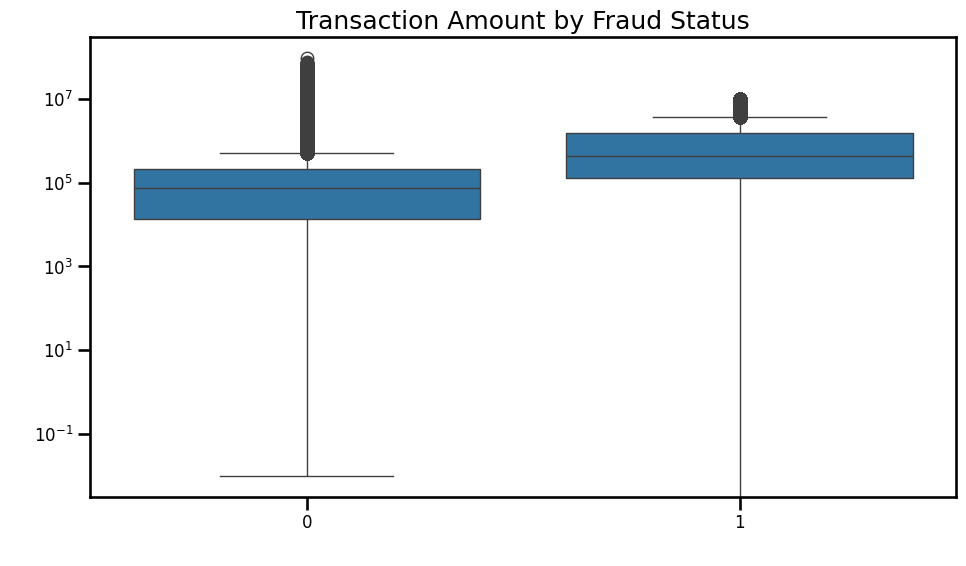

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status', fontsize=12, color='white')
plt.ylabel('Amount', fontsize=12, color='white')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_15060\220114900.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='step', y='amount', hue='isFraud', data=df, ci=None)


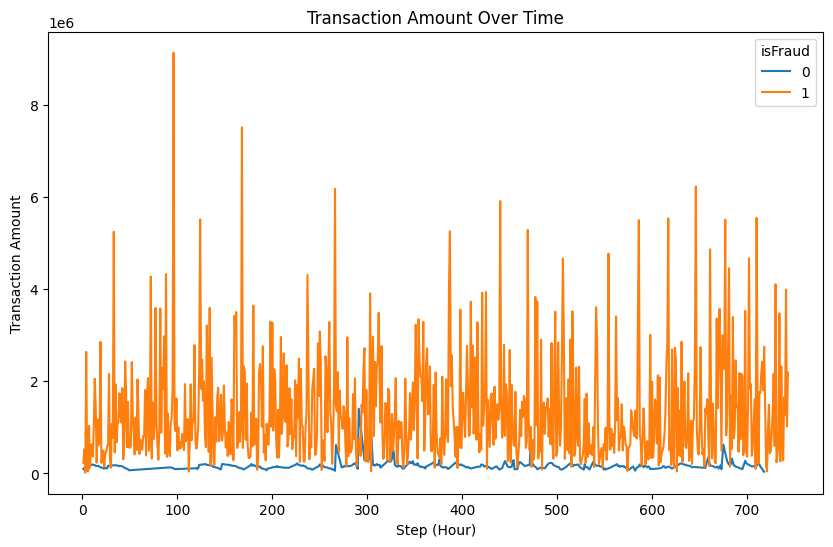

In [3]:
# Transaction count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='amount', hue='isFraud', data=df, ci=None)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Amount')
plt.show()

In [9]:
# List of transaction types to remove
transaction_types_to_remove = ['CASH_IN', 'DEBIT', 'PAYMENT']

# Filter the DataFrame to exclude the specific transaction types
filtered_df = df[~df['type'].isin(transaction_types_to_remove)]

# Select only the desired columns
selected_columns = ['step', 'amount', 'oldbalanceOrg', 'type', 'isFraud']
filtered_df = filtered_df[selected_columns]

# Check if the data is filtered properly
print(filtered_df.head())

# Save the filtered DataFrame to an Excel file
filtered_df.to_csv('onlinefraud_processed.csv.gz', index=False, compression='gzip')

    step     amount  oldbalanceOrg      type  isFraud
2      1     181.00          181.0  TRANSFER        1
3      1     181.00          181.0  CASH_OUT        1
15     1  229133.94        15325.0  CASH_OUT        0
19     1  215310.30          705.0  TRANSFER        0
24     1  311685.89        10835.0  TRANSFER        0
